# Цель работы

Исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

# Основные этапы работы

1. Для первой обучающей выборки построить и обучить сеть, относящую точки правильно к двум классам. Отобразить дискриминантную линию.
2. Изменить для первой выборки обучающее множество, чтобы классы стали линейно неразделимыми. Проверить возможности обучения по правилу Розенблатта.
3. Построить и обучить сеть для второй обучающей выборки, относящую точки к четырём классам. Отобразить дискриминантную линию.

# Код

In [89]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
class Perceptron:
    def __init__(self, epochs=25, lr=0.1, flag=True):
        self.epochs = epochs
        self.lr = lr
        self.weights = []
        self.bias = 0
        self.errors = []
        
    def Train(self, sequences, labels, flag=True):
        random.seed(7)
        if flag:
            self.weights = np.random.sample((2, 2))
            self.bias = np.random.sample(2)
        else:
            self.bias = random.random()
            self.weights = np.random.sample(2)
            
        iteration = 0
        i = 0
        while i < sequences.shape[0]:
            if iteration == self.epochs:
                break
            predictedLabel = self.Predict(sequences[i], self.weights, self.bias, flag)
            error = labels[i] - predictedLabel
            self.errors.append(abs(error))
            if (np.linalg.norm(error) != 0):
                print('iter: {} weights: {} bias: {}\n'.format(iteration, self.weights, self.bias))
                if flag:
                    self.weights += self.lr * sequences[i].reshape(-1, 1).dot(error.reshape(1, -1))
                else:
                    self.weights += self.lr *  sequences[i] * error
                self.bias += self.lr * error
                i = -1
            i += 1
            iteration += 1
        return self.weights, self.bias
    
    def MAE(self):
        return sum(self.errors) / len(self.errors)
    
    def F(self, x, w, b):
        return np.dot(x, w) + b
         
        
    def Predict(self, seq, weights, bias, flag=True):
        if (flag):
            return np.heaviside(self.F(seq, weights, bias), 1)
        return 1 if self.F(seq, weights, bias) >= 0 else 0


In [91]:
def DividingLine(x, w0, w1, b):
    return (-w0 * x - b) / w1

In [92]:
colors = ['r', 'g']
colors2 = [['r', 'g'], ['b', 'y']]

def PlotFirst(df):
    plt.grid(True)
    plt.plot(df[df['y'] == 0]['x1'], df[df['y'] == 0]['x2'], 'o', c=colors[0])
    plt.plot(df[df['y'] == 1]['x1'], df[df['y'] == 1]['x2'], 'o', c=colors[1])
    
def PlotSecond(df):
    plt.grid(True)
    plt.plot(df[(df['y1'] == 0) & (df['y2'] == 0)]['x1'], df[(df['y1'] == 0) & (df['y2'] == 0)]['x2'], 'o', c=colors2[0][0])
    plt.plot(df[(df['y1'] == 1) & (df['y2'] == 1)]['x1'], df[(df['y1'] == 1) & (df['y2'] == 1)]['x2'], 'o', c=colors2[1][1])
    plt.plot(df[(df['y1'] == 0) & (df['y2'] == 1)]['x1'], df[(df['y1'] == 0) & (df['y2'] == 1)]['x2'], 'o', c=colors2[0][1])
    plt.plot(df[(df['y1'] == 1) & (df['y2'] == 0)]['x1'], df[(df['y1'] == 1) & (df['y2'] == 0)]['x2'], 'o', c=colors2[1][0])

### Первая обучающая выборка

In [93]:
sequences1 = np.array([[1.4, 1.3, 1.4, 2.2, 4.9, -4.0], [-0.3, 0.4, 0.4, 0.2, -2.9, -4]], dtype=np.float32)
labels1 = np.array([1, 1, 1, 1, 0, 0])

ds = np.insert(sequences1, 2, labels1, axis=0)
df = pd.DataFrame(ds.T, columns=['x1', 'x2', 'y'])

In [94]:
df

,x1,x2,y
0,1.4,-0.3,1.0
1,1.3,0.4,1.0
2,1.4,0.4,1.0
3,2.2,0.2,1.0
4,4.9,-2.9,0.0
5,-4.0,-4.0,0.0


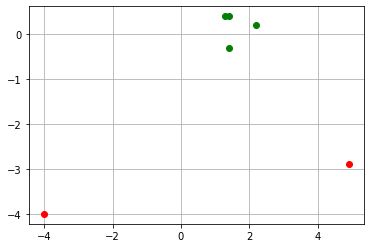

In [95]:
PlotFirst(df)

In [96]:
epochs = 50
lr = 0.1

Случайным образом задам 3 точки.

In [97]:
np.random.seed(5)
randSeqs1 = (np.random.uniform(-5, 5, (3, 2)))
randSeqs1

array([[-2.78006829,  3.70732306],
       [-2.93280845,  4.18610908],
       [-0.11588811,  1.11743863]])

In [98]:
np.random.seed(5)
randLabels1 = np.random.randint(0, 2, 3)
randLabels1

array([1, 0, 1])

Обучим нейросеть на первой обучающей выборке

In [99]:
model = Perceptron(epochs, lr)
weights, bias = model.Train(sequences1.T, labels1, False)
print('weights: {}, bias: {}'.format(weights, bias))

iter: 4 weights: [0.83132783 0.3637369 ] bias: 0.32383276483316237

iter: 9 weights: [0.34132783 0.65373692] bias: 0.22383276483316236

iter: 10 weights: [-0.14867218  0.94373694] bias: 0.12383276483316236

iter: 11 weights: [-0.00867218  0.91373694] bias: 0.22383276483316236

weights: [0.13132782 0.88373694], bias: 0.32383276483316237


In [100]:
model.MAE()

0.2222222222222222

Предскажем классы на случайно заданной выборке

In [101]:
pred = [model.Predict(line, weights, bias, False) for line in randSeqs1]
pred

[1, 1, 1]



Отобразим первую обучающую выборку, случайно заданную выборку (треугольнички) и дискриминантную линию.


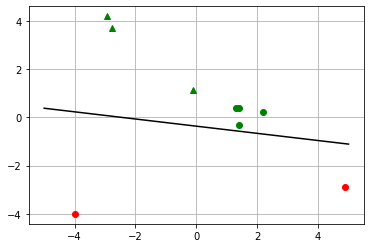

In [102]:
PlotFirst(df)
area = np.linspace(-5, 5, 10)
line = DividingLine(area, weights[0], weights[1], bias)
plt.plot(area, line, color='black')

for x, y, color in zip(randSeqs1[:, 0], randSeqs1[:, 1], pred):
    plt.plot(x, y, "^", c=colors[color])


### Линейная неразделимость

Изменим первую обучающую выборку так, чтобы она стала линейно неразделимой.


In [103]:
sequences_ = np.array([[1.4, 1.3, 1.4, 2.2, 4.9, -4.0], [-0.3, 0.4, 0.4, 0.2, -2.9, -4]], dtype=np.float32)
labels_ = np.array([1, 0, 1, 0, 1, 0])


ds_ = np.insert(sequences_, 2, labels_, axis=0)
df_ = pd.DataFrame(ds_.T, columns=['x1', 'x2', 'y'])

In [104]:
df_

,x1,x2,y
0,1.4,-0.3,1.0
1,1.3,0.4,0.0
2,1.4,0.4,1.0
3,2.2,0.2,0.0
4,4.9,-2.9,1.0
5,-4.0,-4.0,0.0


In [120]:
model_ = Perceptron(epochs, lr)
weights_, bias_ = model_.Train(sequences_.T, labels_, False)
print('weights: {}, bias: {}'.format(weights_, bias_))

iter: 1 weights: [0.37751697 0.81646128] bias: 0.32383276483316237

iter: 3 weights: [0.24751698 0.77646128] bias: 0.22383276483316236

iter: 5 weights: [0.11751698 0.73646128] bias: 0.12383276483316236

iter: 6 weights: [-0.01248301  0.69646127] bias: 0.02383276483316235

iter: 8 weights: [0.12751699 0.66646127] bias: 0.12383276483316236

iter: 9 weights: [-0.00248301  0.62646127] bias: 0.02383276483316235

iter: 11 weights: [0.13751699 0.59646127] bias: 0.12383276483316236

iter: 12 weights: [0.007517   0.55646127] bias: 0.02383276483316235

iter: 14 weights: [0.147517   0.52646126] bias: 0.12383276483316236

iter: 15 weights: [0.017517   0.48646126] bias: 0.02383276483316235

iter: 17 weights: [0.157517   0.45646126] bias: 0.12383276483316236

iter: 18 weights: [0.02751701 0.41646126] bias: 0.02383276483316235

iter: 20 weights: [0.16751701 0.38646126] bias: 0.12383276483316236

iter: 21 weights: [0.03751702 0.34646125] bias: 0.02383276483316235

iter: 23 weights: [0.17751702 0.3164

In [106]:
model_.MAE()

0.42

In [107]:
pred_ = [model.Predict(line, weights_, bias_, False) for line in randSeqs]
pred_

[0, 0, 0]

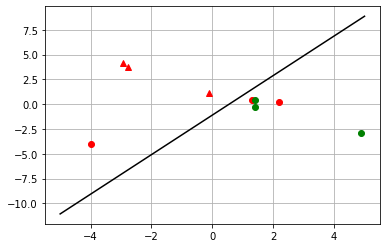

In [108]:
PlotFirst(df_)
area = np.linspace(-5, 5, 10)
line = DividingLine(area, weights_[0], weights_[1], bias_)
plt.plot(area, line, color='black')

for x, y, color in zip(randSeqs1[:, 0], randSeqs1[:, 1], pred_):
    plt.plot(x, y, "^", c=colors[color])


### Вторая обучающая выборка

In [109]:
sequences2 = np.array([[-2.6, -4.1, 4.4, 0.7, -2.7, 3.2, -4.6, 1.4], 
                       [-1, -3.7, 4.5, -4.5, -1.5, -4.9, -3.4, 2.3]], dtype=np.float32)
labels2 = np.array([[0, 0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 1]])

ds2 = np.insert(sequences2, 2, labels2, axis=0)
df2 = pd.DataFrame(ds2.T, columns=['x1', 'x2', 'y1', 'y2'])

In [110]:
df2

,x1,x2,y1,y2
0,-2.6,-1.0,0.0,0.0
1,-4.1,-3.7,0.0,0.0
2,4.4,4.5,0.0,1.0
3,0.7,-4.5,1.0,0.0
4,-2.7,-1.5,0.0,0.0
5,3.2,-4.9,1.0,1.0
6,-4.6,-3.4,0.0,0.0
7,1.4,2.3,0.0,1.0


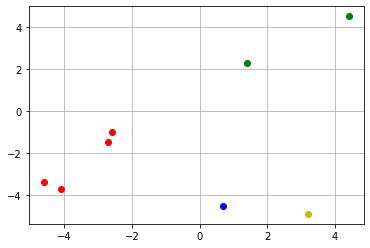

In [111]:
PlotSecond(df2)

Обучаем сеть на 50 эпохах на второй обучающей выборке. Посмотрим вычисленные веса и смещения во время обучения.

In [112]:
sequences2.T.shape

(8, 2)

In [113]:
model2 = Perceptron(epochs, lr)
weights2, bias2 = model2.Train(sequences2.T, labels2.T, True)

iter: 2 weights: [[0.39673661 0.35413804]
 [0.486638   0.99082093]] bias: [0.80828168 0.64945888]

iter: 3 weights: [[-0.0432634   0.35413804]
 [ 0.036638    0.99082093]] bias: [0.70828168 0.64945888]

iter: 6 weights: [[0.21673659 0.35413804]
 [0.136638   0.99082093]] bias: [0.60828168 0.64945888]

iter: 7 weights: [[-0.22326342  0.35413804]
 [-0.313362    0.99082093]] bias: [0.50828168 0.64945888]

iter: 8 weights: [[ 0.03673657  0.35413804]
 [-0.213362    0.99082093]] bias: [0.40828168 0.64945888]

iter: 11 weights: [[ 0.29673656  0.35413804]
 [-0.113362    0.99082093]] bias: [0.30828168 0.64945888]

iter: 12 weights: [[-0.14326345  0.35413804]
 [-0.563362    0.99082093]] bias: [0.20828168 0.64945888]

iter: 13 weights: [[ 0.11673654  0.35413804]
 [-0.463362    0.99082093]] bias: [0.10828168 0.64945888]

iter: 16 weights: [[ 0.37673653  0.35413804]
 [-0.363362    0.99082093]] bias: [0.00828168 0.64945888]

iter: 17 weights: [[-0.06326348  0.35413804]
 [-0.813362    0.99082093]] bias



Полученные итоговые веса, смещения.


In [114]:
print('weights: {}, bias: {}'.format(weights2, bias2))

weights: [[ 0.74673641  0.67413805]
 [-0.56336198  0.50082092]], bias: [-1.19171832  0.74945888]




Ошибка обучения сети


In [115]:
model2.MAE()

array([0.4 , 0.02])

Сделаю случайную выборку.

In [116]:
np.random.seed(8)
randSeqs2 = (np.random.uniform(-5, 5, (5, 2)))
randSeqs2

array([[ 3.73429403,  4.68540663],
       [ 3.6919454 ,  0.30855692],
       [-2.67271672, -4.88601196],
       [-0.69531182, -0.9764864 ],
       [ 0.22674671, -0.21608204]])

In [117]:
np.random.seed(8)
randLabels2 = np.random.randint(0, 2, 5)
randLabels2

array([1, 0, 1, 1, 1])



Предскажем классы на случайно заданной выборке.


In [118]:
pred2 = [model.Predict(line, weights2, bias2, True) for line in randSeqs2]
pred2


[array([0., 1.]),
 array([1., 1.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 1.])]



Отобразим вторую обучающую выборку, случайно заданную выборку (треугольнички) и дискриминантную линию.


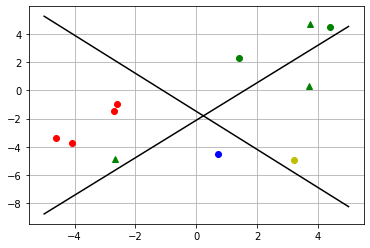

In [119]:
PlotSecond(df2)
area = np.linspace(-5, 5, 10)
line1 = DividingLine(area, weights2[0][0], weights2[1][0], bias2[0])
line2 = DividingLine(area, weights2[0][1], weights2[1][1], bias2[1])
plt.plot(area, line1, color='black')
plt.plot(area, line2, color='black')


for x, y, color in zip(randSeqs2[:, 0], randSeqs2[:, 1], pred):
    plt.plot(x, y, "^", c=colors[color])


# Выводы

В этой лабораторной работе реализовал однослойный перцептрон Розенблатта. 

Обучила модель на двух заданных выборках и затем предсказывал классы объектов. 

Убедился, что однослойный перцептрон Розенблатта не подходит для решения линейно неразделимых задач.